In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


# Data Loading 

In [2]:
df_train = pd.read_csv('./input/train.csv')
df_test = pd.read_csv('./input/test.csv')
ids = df_test['Id'].values

# Data Analysis

In [3]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Density'>

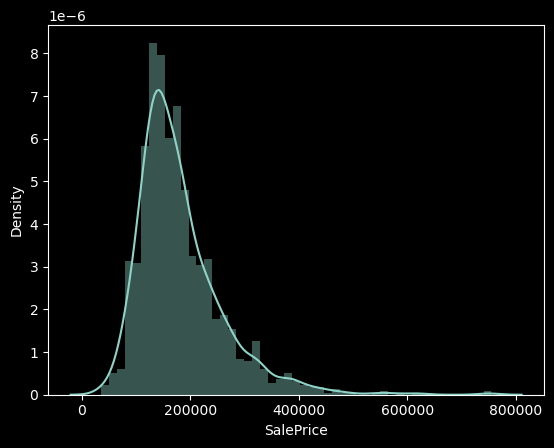

In [5]:
sns.distplot(df_train['SalePrice'])

In [6]:
y_train = df_train.SalePrice.values
x_train = df_train.drop('SalePrice', 1)

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

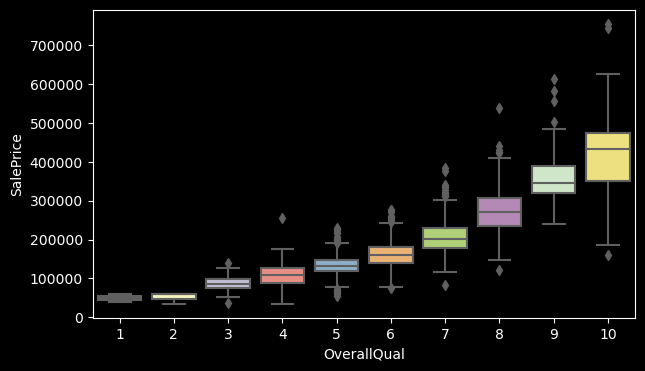

In [7]:
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
plt.figure(figsize=(7, 4))
sns.boxplot(x='OverallQual', y="SalePrice", data=data)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

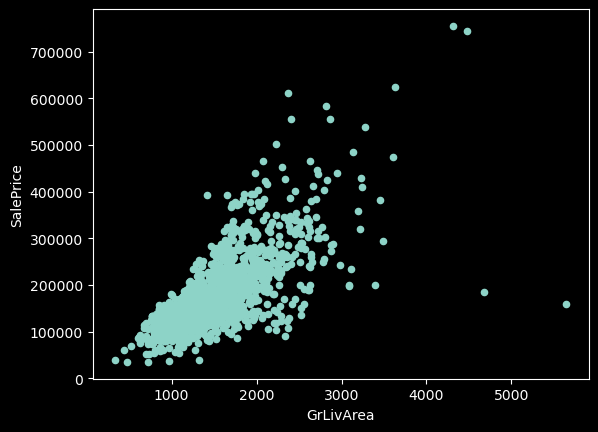

In [8]:
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice')

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

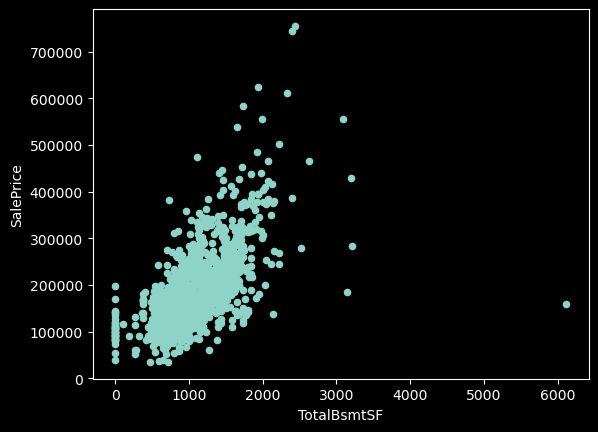

In [9]:
data = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice')

<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

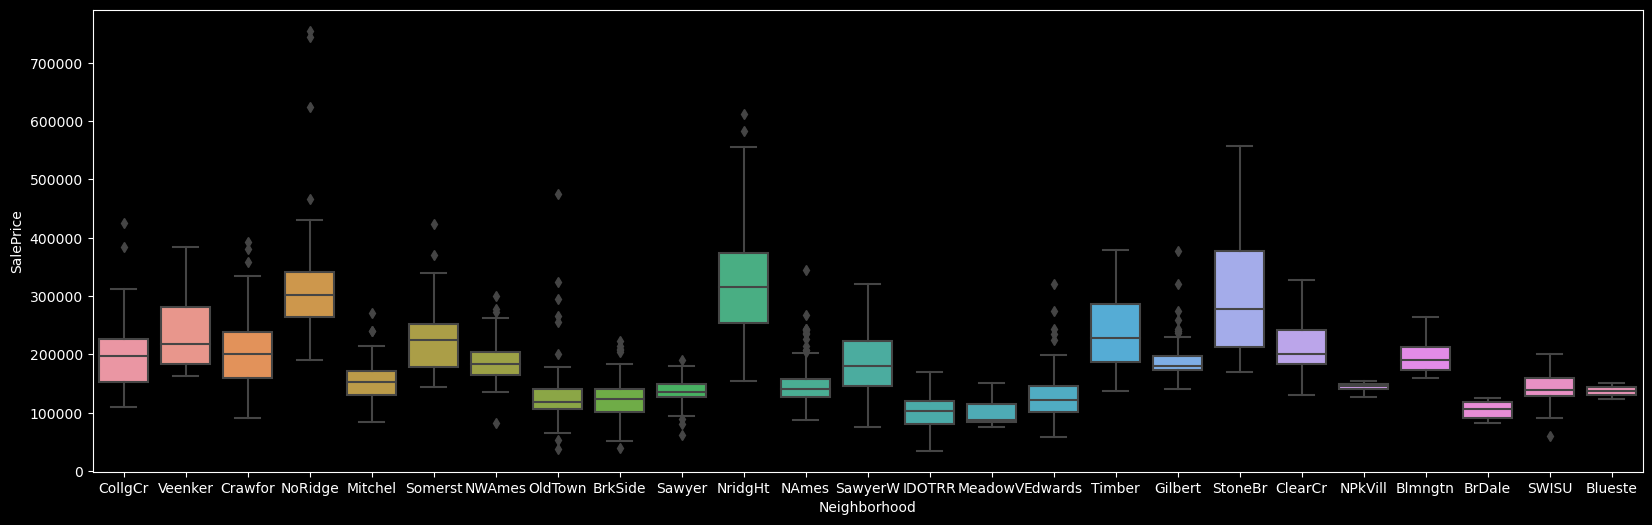

In [10]:
data = pd.concat([df_train['SalePrice'], df_train['Neighborhood']], axis=1)
plt.figure(figsize=(20, 6))
sns.boxplot(x='Neighborhood', y="SalePrice", data=data)

<Axes: >

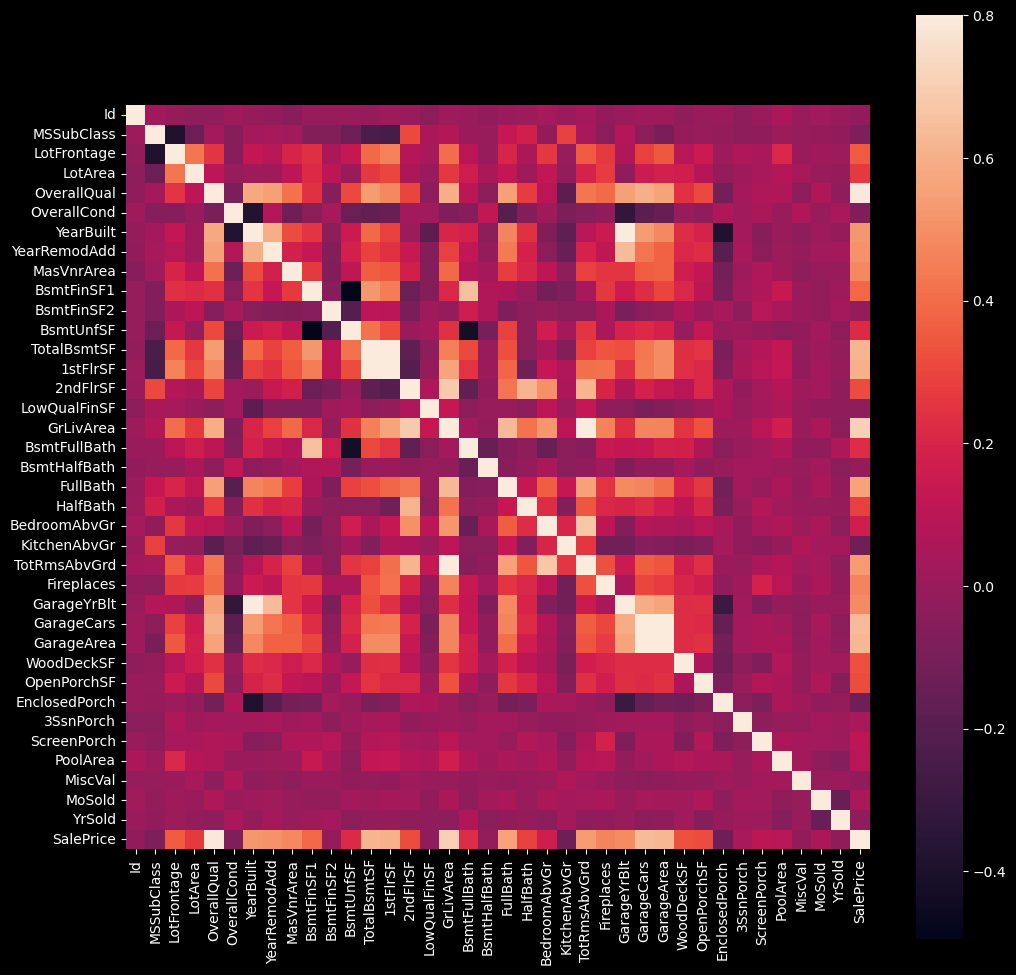

In [11]:
#correlation matrix
corrmat = df_train.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corrmat, vmax=.8, square=True)

# Handling Missing values

In [12]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'percent'])
missing_data.head(20)

,Total,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


First 6 candidates are not affecting the Sale Price too much, but they have too many missing values. We can simply drop them. To fill the rest of the values, I would replace the na with the most common value for the category.

In [13]:
x_train = x_train.drop((missing_data[missing_data['Total'] > 81]).index,1)
x_train = x_train.apply(lambda x:x.fillna(x.value_counts().index[0]))
x_train.isnull().sum().max()

0

In [14]:
x_train.shape

(1460, 74)

In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [16]:
df_test = df_test.drop((missing_data[missing_data['Total'] > 81]).index,1)
df_test = df_test.apply(lambda x:x.fillna(x.value_counts().index[0]))

# Data preprocessing
We can now drop the Id columns, as they are unique and not informative for the model

In [17]:
x_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)
x_train.shape

(1460, 73)

Encoding categorical values

In [18]:
from sklearn.preprocessing import LabelEncoder
cols = x_train.select_dtypes(include='object').columns

for col in cols:
    label = LabelEncoder()
    label.fit(list(x_train[col].values))
    x_train[col] = label.transform(list(x_train[col].values))
    df_test[col] = label.transform(list(df_test[col].values))

x_train.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,8450,1,3,3,0,4,0,5,...,61,0,0,0,0,0,2,2008,8,4
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,0,5,2007,8,4
2,60,3,11250,1,0,3,0,4,0,5,...,42,0,0,0,0,0,9,2008,8,4
3,70,3,9550,1,0,3,0,0,0,6,...,35,272,0,0,0,0,2,2006,8,0
4,60,3,14260,1,0,3,0,2,0,15,...,84,0,0,0,0,0,12,2008,8,4


Removing some outliers

In [19]:
indexes = x_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index

x_train = x_train.drop(indexes)
y_train = np.delete(y_train, indexes)
y_train.shape

(1458,)

# Creating a model

In [20]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

start with XGB boost

In [21]:
model_xgb = xgb.XGBRegressor(n_estimators=2200)
n_folds = 5

def rmsle(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train.values)
    rmse = np.sqrt(-cross_val_score(model, x_train.values, y_train, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

Fit model and generate predictions

In [22]:
model_xgb.fit(x_train, y_train)
xgb_train_pred = model_xgb.predict(x_train)
xgb_pred = model_xgb.predict(df_test)
print(rmsle(y_train, xgb_train_pred))
print(xgb_pred)

0.06212630884028025
[121946.336 144455.5   179049.39  ... 149236.66  112257.555 224105.94 ]
